<a href="https://colab.research.google.com/github/Albina1310/Albina1310/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

**Задача — установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.**

**Данные следующие:**
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах (м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — общая площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

## Откроем файл с данными и изучим общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

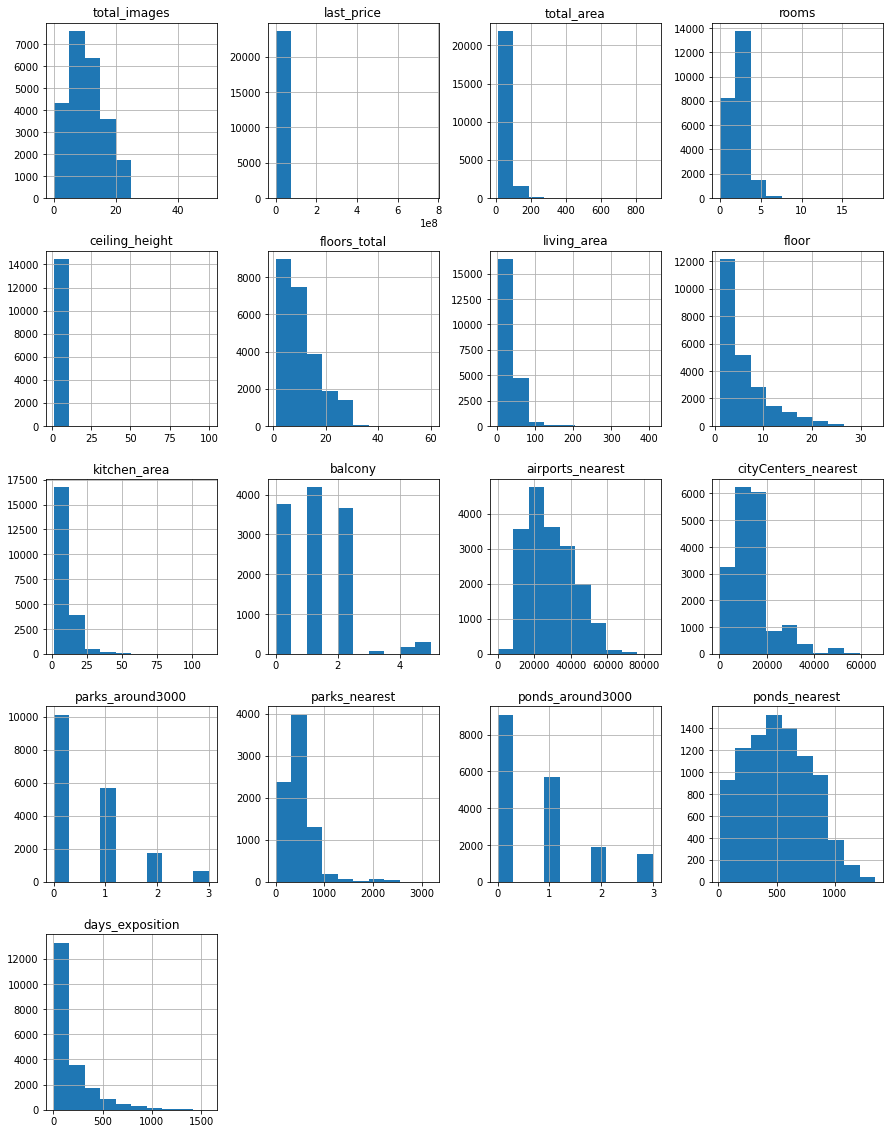

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head())
print(data.info())
data.hist(figsize=(15, 20));

Таблица состоит из 22 колонок и 23699 строк. Из информации о таблице можно сделать первые выводы и необходимые действия:
- first_day_exposition - 'object' - должен быть тип 'datetime'
- ceiling_height -  много пропусков
- floors_total - 'float' - должен быть тип 'int'
- living_area - есть немного пропусков
- is_apartment - 'object' - должен быть тип 'bool'  и пропуски в огромном количестве
- kitchen_area - есть немного пропусков
- balcony - 'float' - должен быть тип 'int' и много пропусков
- locality_name - есть немного пропусков
- airports_nearest - много пропусков
- cityCenters_nearest - много пропусков
- parks_around3000 - 'float' - должен быть тип 'int' и много пропусков
- parks_nearest -  много пропусков
- ponds_around3000 - 'float' - должен быть тип 'int' и много пропусков
- ponds_nearest - много пропусков
- days_exposition - 'float' - должен быть тип 'int' и немного пропусков

## Предобработка данных

### Обработка пропусков и изменение типа данных

In [ ]:
import matplotlib.pyplot as plt
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Как и писала выше мы видим во многих столбцах пропуски и неправильно стоящий тип данных. Нужно это все обработать для дальнейшего глубокого анализа с данными и их корректности.

**Нужно обработать пропуски, выделяющиеся значения, тип данных, посмотреть графики.** по каждому столбцу из списка:
- first_day_exposition
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition

#### 'ceiling_height'

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
   4.45   5

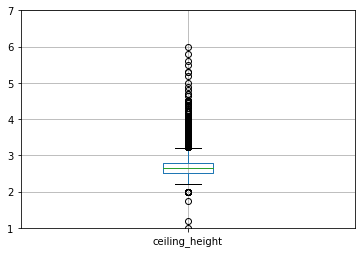

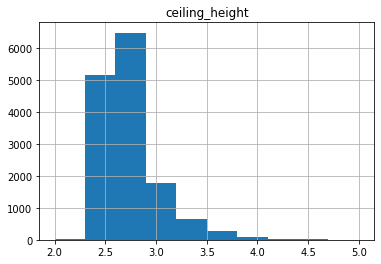

In [ ]:
print(data['ceiling_height'].unique())
print(data['ceiling_height'].describe())
print(data.boxplot(column='ceiling_height'))
plt.ylim(1, 7)
print(data.hist('ceiling_height', bins=10, grid=True, range=(2, 5)))

In [ ]:
data = data.replace({'ceiling_height':{25.:2.5, 26.:2.6, 27.:2.7, 32.:3.2, 24.:2.4, 27.5:2.75}}) # заменили выделяющиеся значения
ceiling_height_good_mean = data.query('2.2 <= ceiling_height <= 3.5')['ceiling_height'].mean()# среднее значение без учета выбросов
print(ceiling_height_good_mean)
data['ceiling_height'] = data['ceiling_height'].fillna(2.7) # заменили пропуски на среднее значение
print(data.query('2.2 <= ceiling_height <= 3.5')['ceiling_height'].count()) # 23699-23401=298 значений-выбросов
print(data['ceiling_height'].describe())
print(data['ceiling_height'].isna().sum())

2.70497465859496
23401
count    23699.000000
mean         2.723536
std          0.699394
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
0


Мы в первую очередь заменили выбивающиеся значения, которые произошли по ошибке введения данных (25 на 2.5 и т.д.). В данном столбце min=1.0 и max=100, что является явным разбросом данных и их неправдоподобностью, но данные выбросы не сильно влияют на общий анализ. Посчитав колличество строк с выбросами, мы увидели их малое количество - всего 298 значений - оставим в таблице,не меняя на среднюю, так как они не влияют на показатели.Большое количество пропусков получили скорее всего из-за человеческого фактора - многие не измеряют размер и проще пропустить этот пункт в объявлении. Заменили мы их средним значением, так как выбросов мало, а среднее вполне будет корректным для заполнения (медиана и среднее практически равны).

#### floors_total

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'floors_total'}>]]


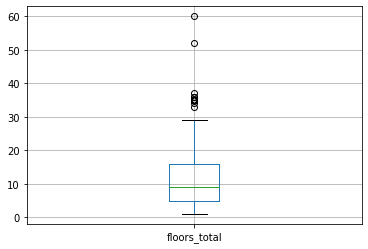

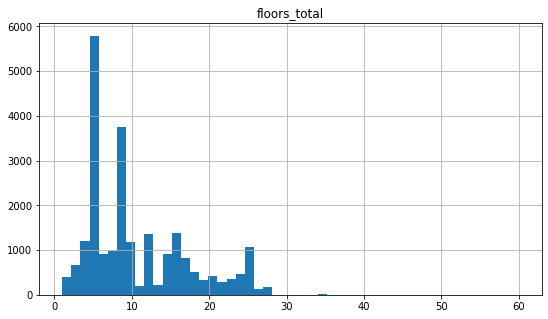

In [ ]:
print(data['floors_total'].unique()) # нужно заменить с float на int, так как этаж не может быть дробным
print(data['floors_total'].describe())
print(data.boxplot(column='floors_total')) # выбросы по графикеу - значения выше 30
print(data.hist('floors_total', bins=50, figsize=(9, 5), grid=True))

In [ ]:
data['floors_total'] = data['floors_total'].fillna(7777).astype('int') # заменили на 777 пропуски перевели в нужный нам тип данных
print(data['floors_total'].unique())
print(data.query('1<=floors_total<30')['floors_total'].count()) # 23613-23581=118 строк - выбросы
print(data['floors_total'].isna().sum())

[  16   11    5   14   12   26   24   27    9    6   17   25    3   23
   19   18    4   22    8    2   10    7   13   15 7777   20   28   36
   21   35   34   60    1   29   33   52   37]
23581
0


Количество пропусков 86. Их заменить нечем и оставили их как есть в таблице. Наибольшее число значений варьируется от 1 до 30 (выбиваются значения 5 и 9). Квартир с большей этажносью дома - 118 значений, которые являются еще и выбросами. Лучше их оставить, так как заменить на среднее будет не правильно, ведь дома с большой этажностью вполне могут быть(Дома в Санкт-Петербурге разной высоты, есть и очень большие). Среднее значение - 10 и медиана - 9 немного отличаются.

#### living_area

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'living_area'}>]]
[[<AxesSubplot:title={'center':'total_area'}>]]


10

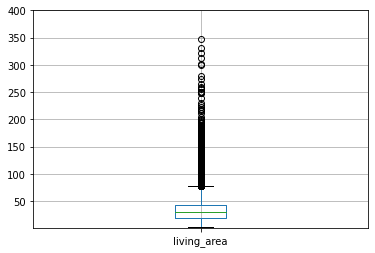

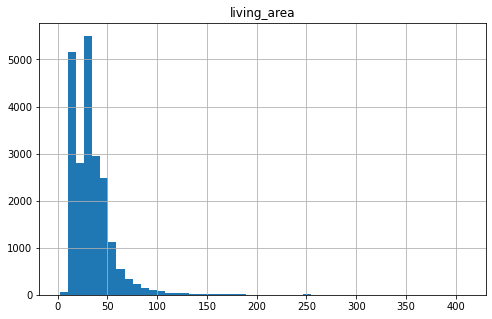

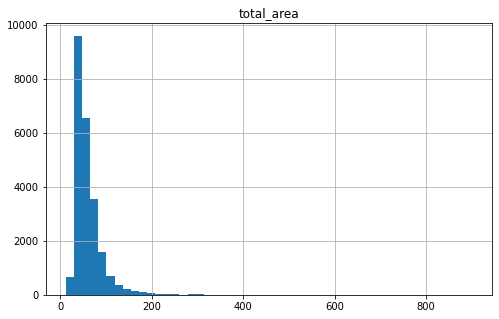

In [ ]:
print(data['living_area'].describe())
print(data.boxplot(column='living_area'))
plt.ylim(1, 400)
print(data.hist('living_area', bins=50, figsize=(8, 5), grid=True))
print(data.hist('total_area', bins=50, figsize=(8, 5), grid=True))
data.query('studio == True')['living_area'].isna().sum() # посчитаем количество пропущенных строк, из-за того что жилая площадь
                                                        # и есть студия = 10. пропуски не связаны со студиями

In [ ]:
kof_mean_total_area = data[data['living_area'].isna() == False]['total_area'].mean()/data[data['living_area'].isna(
) == False]['living_area'].mean()
print(kof_mean_total_area)
data['living_area'] = data['living_area'].fillna(data['total_area']/kof_mean_total_area)
print(data.query('living_area>80')['living_area'].count()) #выбросы - значение выше 80 их 767
print(data['living_area'].isna().sum())

1.7438475520265275
767
0


Количество пропусков *1903 строки* - что достаточно много, поэтому их надо было заполнить для дальнейшего анализа. Пропуски могли появиться в силу того, что клиент не считал размер жилой площади отдельно, да и не всем всегда понятно что входит в это понятие, просто некоторые люди этот пункт пропускали. Чтобы корректно их заполнить, мы вычислили коэффицент средней общей площади к средней жилой площади без учета пропусков и заполнили пропуски в столбце = общая_площадь/коэфицент(чем больше средняя общая площадь, тем больше и средняя жилая). Заполнять на медиану или среднее будет не совсем корректно ведь размер площади в реальности варьируется с большим размахом, ведь в жилую площадь не входят с/у, а у кого- то их несколько в домах и квартире. Что касается графика по выбросам, то предположить что жилая площадь может быть равной 200 кв.м. вполне реально, так как есть объекты и общей площадью более 300 кв.м. Выбросов = 686, на мой взгляд не критично много, поэтому в исходном фрейме мы их оставим, заменять не будем - данные вполне реальные. Также выглядит правдоподобно, где: средняя = 34 кв.м., медиана = 30 кв.м.

#### is_apartment

In [ ]:
print(data['is_apartment'].unique()) # видим,что есть 2 уникальных значения
print(data['is_apartment'].describe())

[nan False True]
count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object


Пропусков было 20924 ,из чего мы сделали вывод, что скорее всего пропуски не заполняли- так как большинство объектов квартиры, а не апартаменты, т.е. заполняющий не видит смысла писать об этом, поэтому заполним их на False.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].isna().sum())
print(data.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest 

Заполнив пропуски наш столбец перешел из типа ***'object' в 'bool'*** - чего мы изначально и хотели.

#### kitchen_area

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'kitchen_area'}>]]
20262


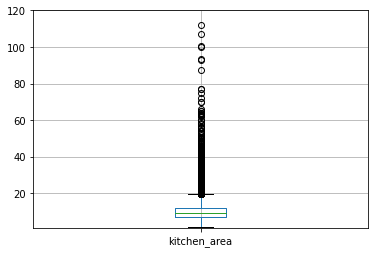

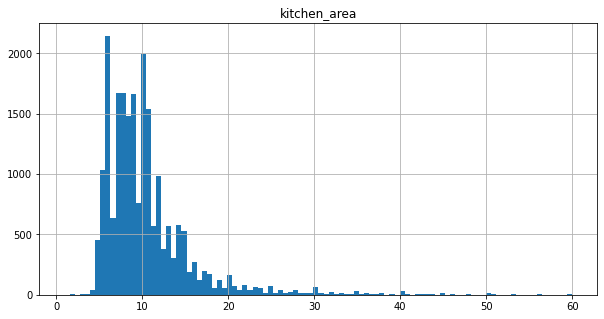

In [ ]:
print(data['kitchen_area'].describe())
print(data.boxplot(column='kitchen_area'))
plt.ylim(1, 120)
print(data.hist('kitchen_area', bins=100, figsize=(10, 5), grid=True, range=(1, 60)))
data.query('studio == True')['kitchen_area'].isna().sum() # пропущенных строк, где кухню не указали, так как это студия = 149.
                                                          # пропуски не связаны с студиями
print(data.query('kitchen_area<20')['kitchen_area'].count())

Есть пропуски - 2278, что является большим количетсвом. Согласно графику выбросы за пределами 20 кв.м.,среднее и медиана практически равны: 10 и 9 кв.м. соответственно. Пропуски оставим,так как заменить медианой или высчитать такой же коэффицент как и в жилой площади будет не корректно (просто кухню могли не указывать, так как живут например в коммуналке). Разброс большой и размер кухни варьируется от 1 до 112 кв.м. Мы видим количество выбросов: 21421-20262 = 1200.

#### balcony

[nan  2.  0.  1.  5.  4.  3.]
count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


(1.0, 6.0)

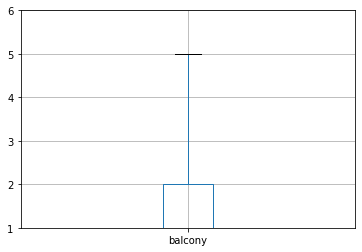

In [ ]:
print(data['balcony'].unique())
print(data['balcony'].describe())
print(data.boxplot(column='balcony'))
plt.ylim(1, 6)

Видим из графиков, что число балконов варьируется от 0 - 5 , а значения от 3 до 5 - это выбросы. Поэтому мы их оставим и менять или удалять не будем - некорректно, так как реальной цифры мы не знаем, спргнозировать или высчитать не вижу возможности. Для дальнейшего анализа они не влияют на показатели. Также столбец находится в типе ***float, а нужно в int***, так как число балконов не может быть дробным. Количество пропусков очень много = 11519 строк, мы их заполним значением 0, потому что люди не указывали балкон скорее всего из-за его отсутствия, поэтому пропускали.

[0 2 1 5 4 3]
0
568
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15 

array([[<AxesSubplot:title={'center':'balcony'}>]], dtype=object)

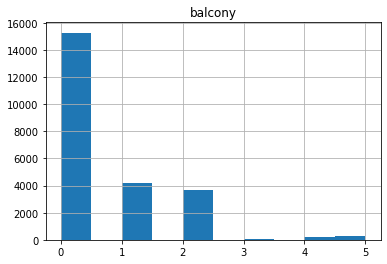

In [ ]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
print(data['balcony'].unique())
print(data['balcony'].isna().sum())
print(data.query('balcony > 2')['balcony'].count()) # количество выбросов 568
print(data.info())
data.hist('balcony', bins=10, grid=True)

#### locality_name

In [ ]:
print(data['locality_name'].describe())
print(data['locality_name'].unique())
print(data['locality_name'].value_counts())


count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посё

Первое, что бросается в глаза при выводе уникальных значений - буква "ё", вместо "е". Также, чтобы названия одного и того же населенного пункта были учтены правильно (например «поселок Рябово» и «поселок городского типа Рябово»), мы просто уберем все уточненния перед названиями, такие как "поселок", "село", "деревня" и т.д. Всего уникальных значений по названиям 364.

In [ ]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].replace(
    ['поселок ', 'городской ', 'деревня ', 'городского типа ','село ', 'коттеджный ', 'садовое ', 'товарищество ', 'имени ',
    'садоводческое ', 'некоммерческое ', 'при железнодорожной ', 'станции '], '', regex=True)
print(data['locality_name'].value_counts())

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Вахнова Кара           1
Плоское                1
Высокоключевой         1
Коммунары              1
Гладкое                1
Name: locality_name, Length: 305, dtype: int64


Осталось уникальных значений по названиям 305. Что касается пропусков, их всего 49, заменить их не можем, поэтому отставим их.

#### airports_nearest
#### cityCenters_nearest   
#### parks_nearest       
#### ponds_nearest   

Во всех столбцах расстояние в метрах от объекта. Пропуски в этих данных мы можем только заменить на заглушку, а лучше оставить как есть, так как заполнить их на среднее или медиану будет не корректным, мы не знаем точного расстояния тех или иных объектов. Выбросы также удалить или заменить будет не правильным - данные в этих строках нам еще нужны для дальнейшего анализа, любое расстояние мы берем за правду. Далее эти данные для глубокого анализа не пригодятся.

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64
count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64
count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64
[[<AxesSubplot:title={'center':'airports_nearest'}>]]
[[<AxesSubplot:title={'center':'cityCenters_nearest'}>]]
[[<AxesSubplot:title={'center':'parks_nearest'}>

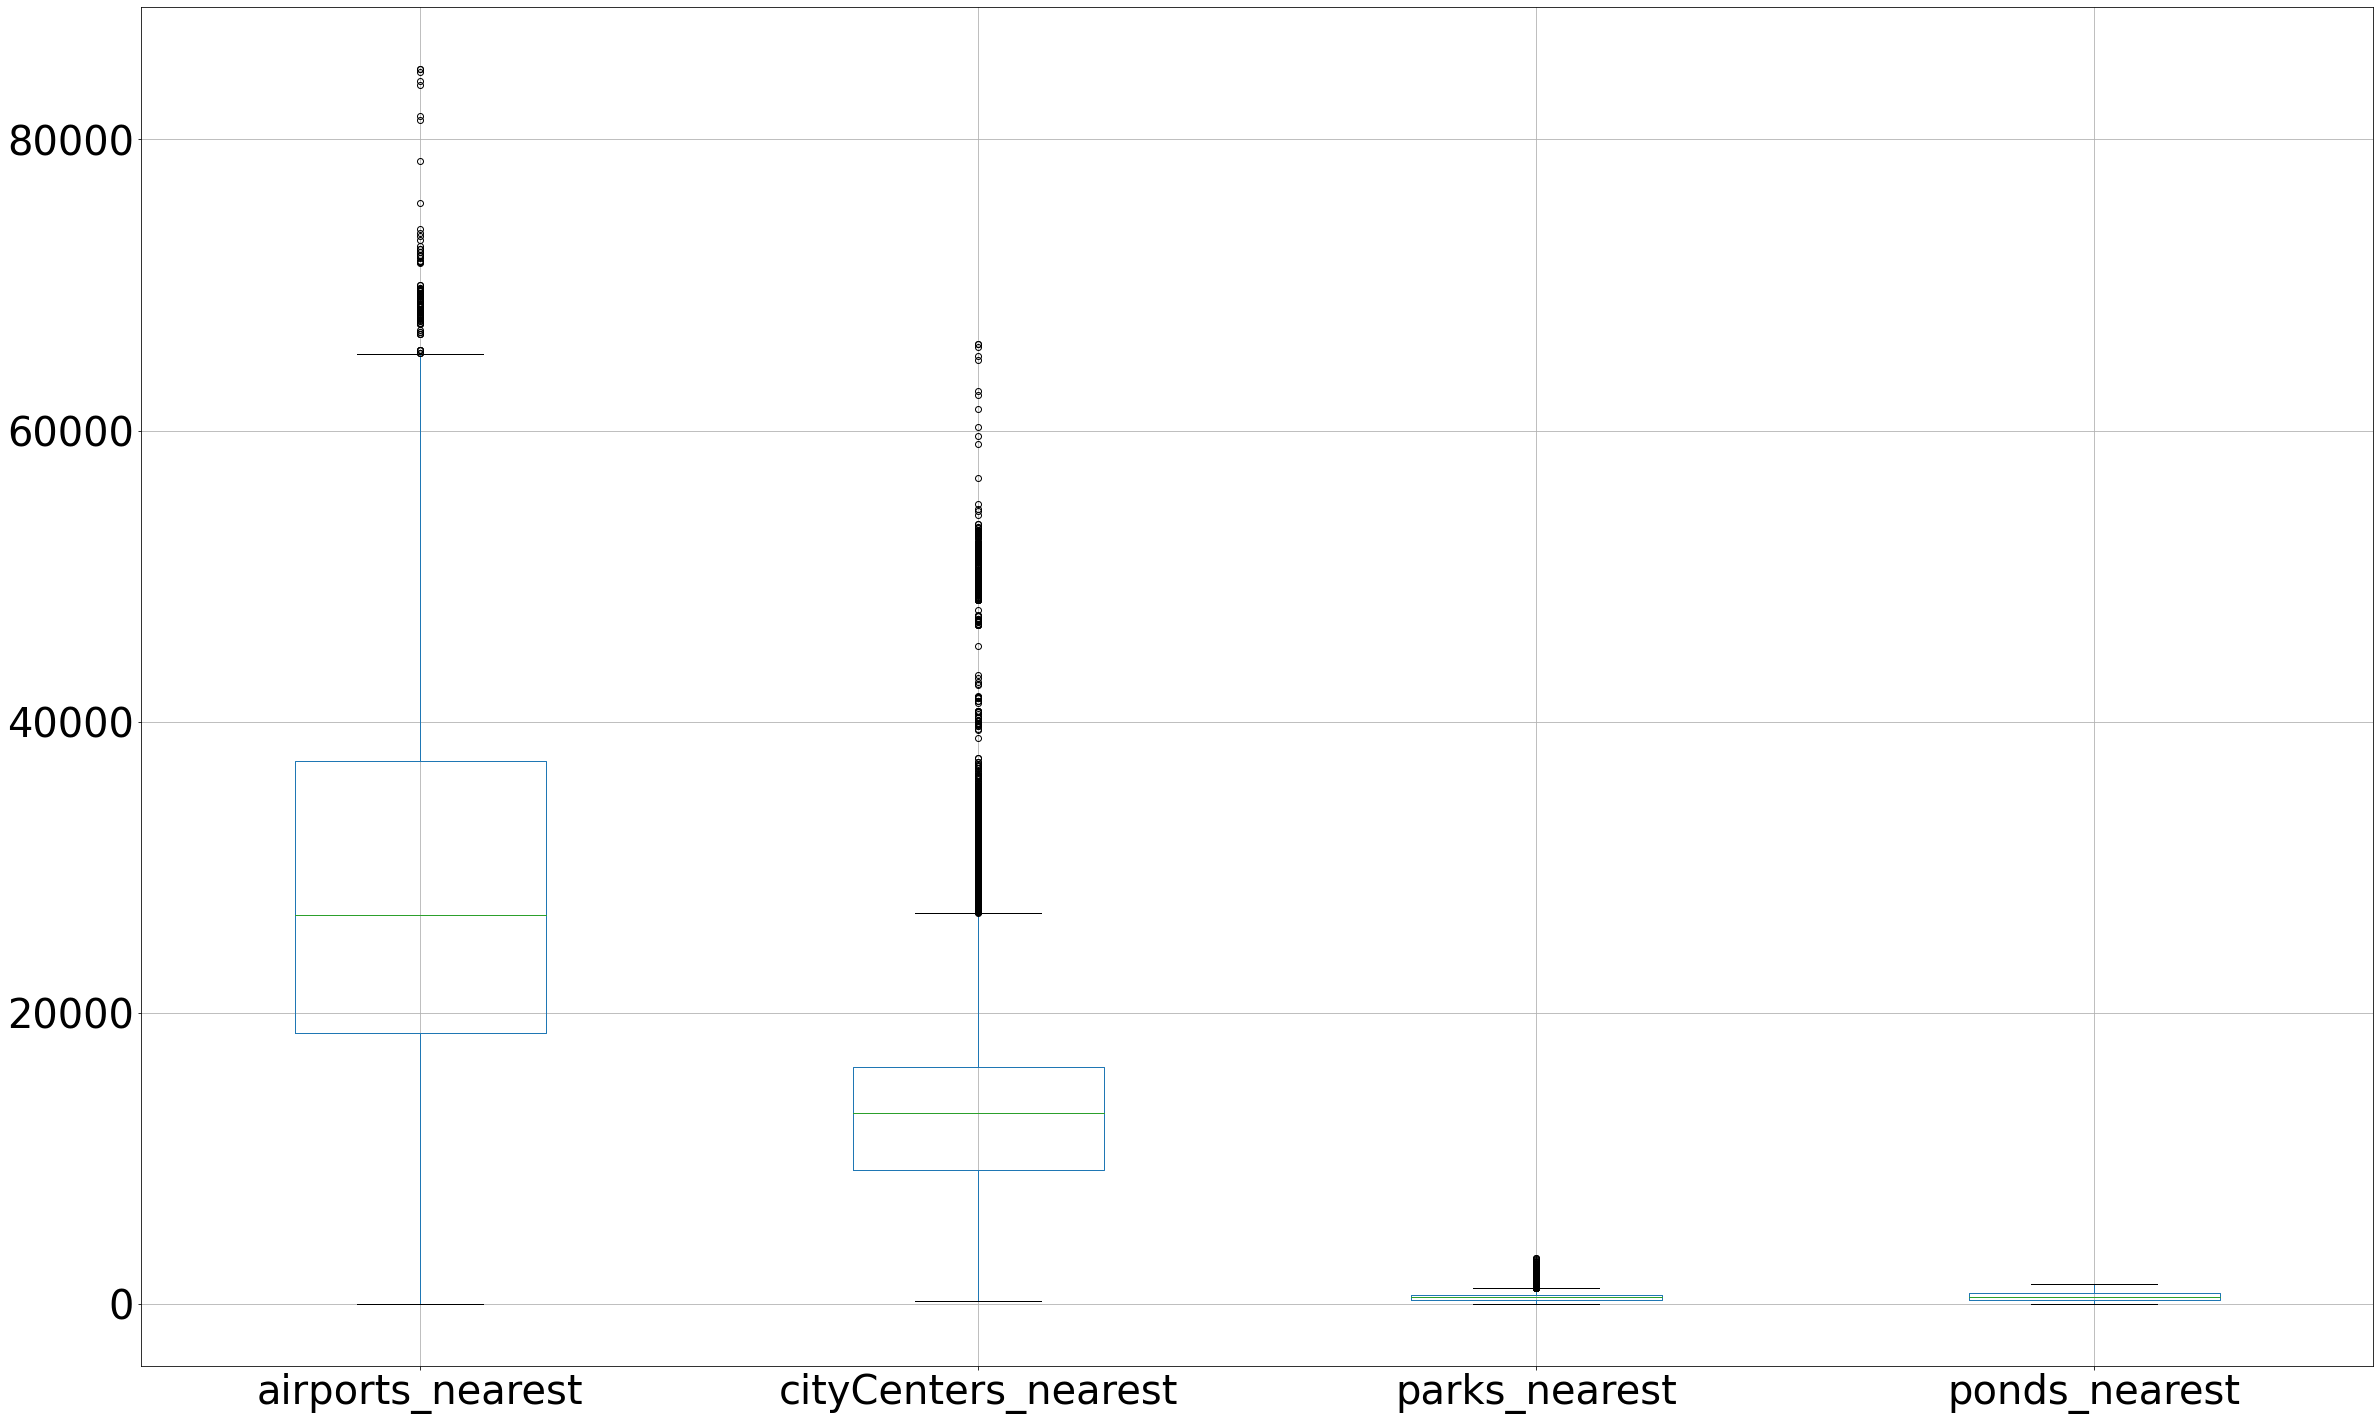

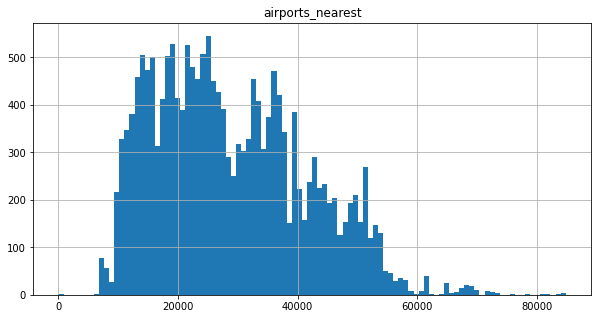

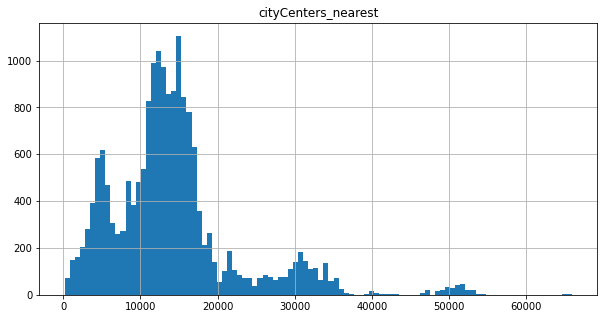

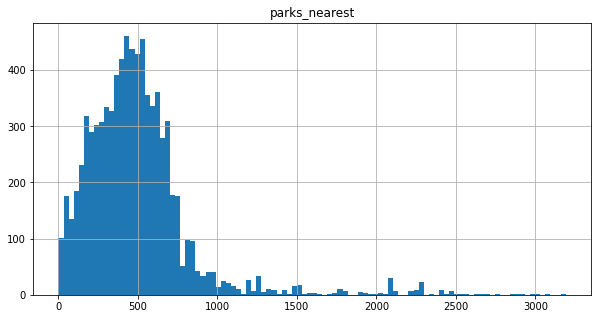

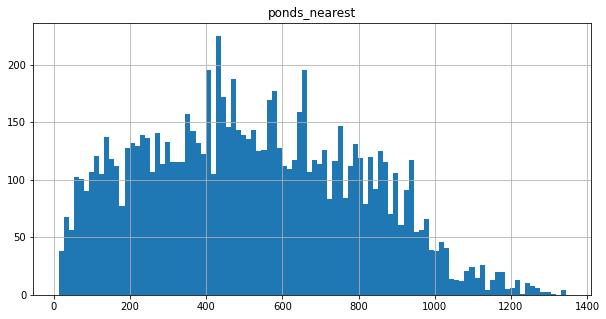

In [ ]:
print(data['airports_nearest'].describe())
print(data['cityCenters_nearest'].describe())
print(data['parks_nearest'].describe())
print(data['ponds_nearest'].describe())
axes = plt.subplots(figsize=(40,25))
ylims = [70000, 70000, 10000, 1000]
column_list = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']
plot_nearest = data.boxplot(column=column_list, fontsize=40)
print(data.hist('airports_nearest', bins=100, figsize=(10, 5), grid=True))
print(data.hist('cityCenters_nearest', bins=100, figsize=(10, 5), grid=True))
print(data.hist('parks_nearest', bins=100, figsize=(10, 5), grid=True))
print(data.hist('ponds_nearest', bins=100, figsize=(10, 5), grid=True))

Если исходить из имеющихся данных, то объекты находятся от аэропорта в большей степени в пределах 10 000 - 50 000, от центра города в пределах 0 - 20 000, от парка в пределах 0 - 1000 м, от пруда в пределах 0 - 1200 м.

#### - parks_around3000
#### - ponds_around3000

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64
[ 1.  0.  2. nan  3.]
count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64
[ 2.  0.  3.  1. nan]
[[<AxesSubplot:title={'center':'parks_around3000'}>]]
[[<AxesSubplot:title={'center':'ponds_around3000'}>]]


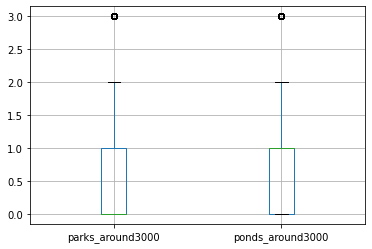

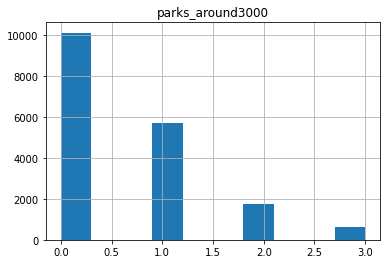

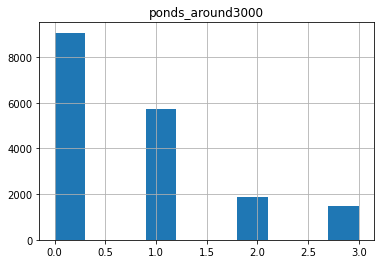

In [ ]:
print(data['parks_around3000'].describe())
print(data['parks_around3000'].unique())
print(data['ponds_around3000'].describe())
print(data['ponds_around3000'].unique())
column_list = ['parks_around3000', 'ponds_around3000']
plot_around = data.boxplot(column=column_list, fontsize=10)
print(data.hist('parks_around3000', bins=10, grid=True))
print(data.hist('ponds_around3000', bins=10, grid=True))

Здесь нам нужно перевести тип данных из ***float в int***,  так как количество парков и прудов целочисленные значения, не может быть 0,5 парка. Видим, что большинство объектов имеют 0 или 1 парк и пруд. Выбросы в количестве 3 мы не будем трогать и оставим, возможно такое редкое явление имеет место быть.

In [ ]:
data['parks_around3000'] = np.floor(pd.to_numeric(data['parks_around3000'], errors='coerce')).astype('Int64')
data['ponds_around3000'] = np.floor(pd.to_numeric(data['ponds_around3000'], errors='coerce')).astype('Int64')
print(data.query('parks_around3000 == 3')['parks_around3000'].count()) # количество выбросов 647
print( data.query('ponds_around3000 == 3')['ponds_around3000'].count()) # выбросы = 1501 строка
data.info()

647
1501
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_n

#### days_exposition
Для обработки пропусков, а также изменения в нем типа данных с ***float на int*** (дни- целое число) мы посмотрим информацию этого столбца.

[  nan   81.  558. ... 1360. 1007.  971.]
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'days_exposition'}>]]


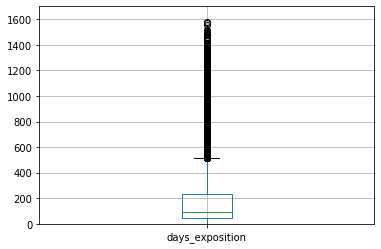

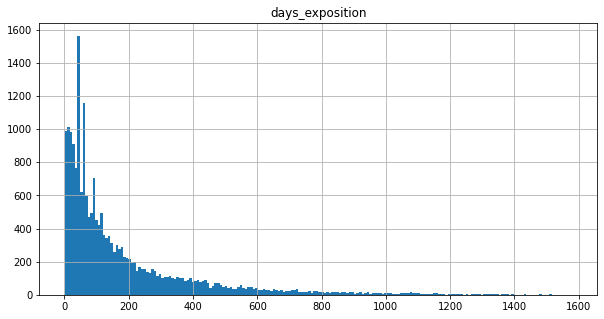

In [ ]:
print(data['days_exposition'].unique())
print(data['days_exposition'].describe())
print(data.boxplot(column='days_exposition'))
plt.ylim(0, 1700)
print(data.hist('days_exposition', bins=200, figsize=(10, 5), grid=True))

Cудя по гистограмме - мы имеем распределение Пуассона. Есть квартиры, которые продавались более 4-х лет. Возможно объявления вовремя не были закрыты, из-за этого срок продажи не соответствует реальным и имеет очень большое значение. Также не понятны странные выбивающиеся значения- пики.
Среднее время продажи - 180 дней. Медианое - 95 дней, что выглядит более менее правдоподобно.

Посмотрим по графику поближе, какие значения выбиваются

45.0     880
60.0     538
7.0      234
30.0     208
90.0     204
        ... 
474.0      4
457.0      4
373.0      3
2.0        3
1.0        1
Name: days_exposition, Length: 499, dtype: int64

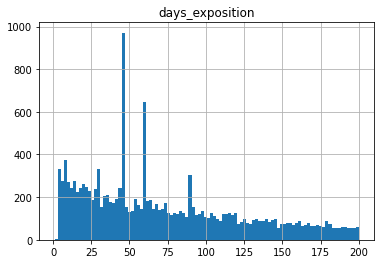

In [ ]:
data.query('days_exposition<500').hist('days_exposition', bins=100, grid=True, range=(1,200))
data.query('days_exposition<500')['days_exposition'].value_counts()

Сделав гистограмму, обнаружили выбивающиеся значения на 45 и 60 и 90 дней - это наиболее популярное количество дней нахождения объявлений на сайте. Дальше переведем из типа float в int.

In [ ]:
print(data['days_exposition'].isna().sum())
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
print(data.info())

3181
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_neare

Пропуски мы ничем заменить не можем, оставим как есть. Причину пропусков лучше уточнить у сотрудников, которые собирают данные. А что касается выбивающихся значений, то на сайте Яндекса в правилах размещения объявления видно, что срок размещения квартир ставится как раз в эти сроки и по истечению 45,60,90 дней они автоматически убираются, если их не продлить. Объекты *продаются в среднем в течении 3-5 месяцев*. *Быстрыми продажами можно считать первые 100 дней, а необычно долгими можно считать более 500 дней.*

#### first_day_exposition

В нем мы изменим тип данных с ***'object' на 'datetime'***.
Посмотрим информацию о нем.

In [ ]:
print(data['first_day_exposition'].head())
print(data['first_day_exposition'].describe())

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object
count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object


Видим, что время в часах и мунутах нет, поэтому можно оставить только дату.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
print(data['first_day_exposition'].value_counts())# видим февраль 2018г., сентябрь, октябрь и ноябрь 2017 года выделяются.
print(data.info())
data.head(10)

2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-05-17      1
2017-01-06      1
2016-12-30      1
2016-07-06      1
2015-03-27      1
Name: first_day_exposition, Length: 1491, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000.0,40.40,2018-12-04,1,2.70,11,18.600000,1,False,...,11.00,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.300000,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,2.70,14,91.177695,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.40,2018-09-10,1,2.70,12,14.400000,5,False,...,9.10,0,Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55
6,6,3700000.0,37.30,2017-11-02,1,2.70,26,10.600000,6,False,...,14.40,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000.0,71.60,2019-04-18,2,2.70,24,41.058635,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.430000,26,False,...,8.81,0,Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,189
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


**Вывод из первой части нашей работы:**

Пропуски в данных в основном появляютися из-за нежелания заполнять данные, например число балконов-когда его нет у тебя или расстояния до центра или пруда, когда ты не измерял и в этом нет необходимости, размер кухни или жилой площади, когда ты знаешь общую площадь и не хочется углублятся в детали. Там где возможно было заполнить корректно пропуски мы это сделали в столбцах:  *ceiling_height*, *living_area*, *is_apartment*, *balcony*. Некоторые мы оставили без изменений: *kitchen_area*, *locality_name*, *airports_nearest*, *cityCenters_nearest*, *parks_nearest*, *ponds_nearest*, так как заполнить средним или медианой будет неверно. Строки с выбросами мы нигде не изменили и не удалили с data, так как в тех строках есть данные, которые нам потом пригодятся для дальнейшего анализа - выбросы в целом не влияют на показатели. То есть исходный data  мы оставим практически без изменений ведь в любой момент может что-то и пригодится от первоначалной версии таблицы.

### Изучим данные оставшихся столбцов.

Остались не изучены столбцы:
- total_images              
- last_price                 
- total_area                 
- rooms                     
- floor
- studio                    
- open_plan                

#### total_images

[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'total_images'}>]]
55


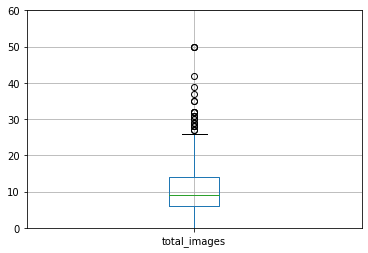

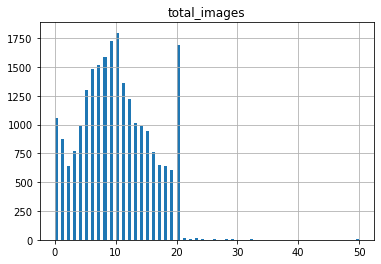

In [ ]:
print(data['total_images'].unique())
print(data['total_images'].describe())
print(data.boxplot(column='total_images'))
plt.ylim(0, 60)
print(data.hist('total_images', bins=100, grid=True))
print(data.query('total_images>=23')['total_images'].count())

Из данной информации видим, что среднее и медиана количества размещения фотографий = 9,  min=0,  max=50. Из графиков следует: обычно размещают фото в количестве от 0-22, далее идет выброс и их количество небольшое = 55 строки.

#### total_area

[108.    40.4   56.   ...  66.86 133.81  76.75]
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'total_area'}>]]
22601


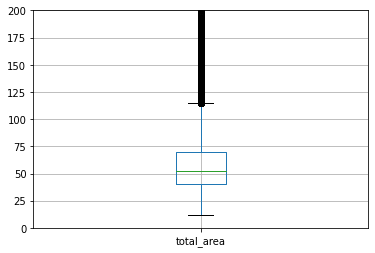

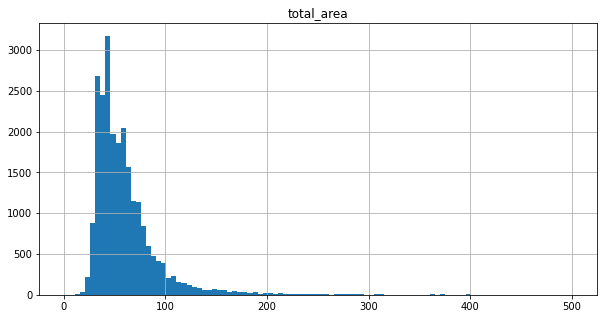

In [ ]:
print(data['total_area'].unique())
print(data['total_area'].describe())
print(data.boxplot(column='total_area'))
plt.ylim(0, 200)
print(data.hist('total_area', bins=100, figsize=(10, 5), grid=True, range=(1,500)))
print(data.query('10<total_area<120')['total_images'].count())# выбросов равно 23699-22601 = 1098 (4,5%)

Общая площадь имеет среднее значение = 60кв.м., медиана = 52 кв.м., минимальное = 12 кв.м., максимальное = 900 кв.м. Можно предположить, что продавались в основном 1-комнатные или небольшие двух-комнатные. Продавались объекты с площадью в диапазоне 25 - 100 кв.м. Выше 120 кв.м. идут выбросы = 1098 строк. Среднее и медиана близки по значениям и выглядят данные правдоподобно. Удалять или менять выбросы не будем, они не влияют на дальнейший анализ, да и вполне реально что есть объекты с большой площадью (3-х этажный пентхаус допустим). Пока оставим как есть, в дальнейше для глубоко анализа мы их будем убирать с помощью среза.

#### last_price

[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
1941
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'last_price'}>]]


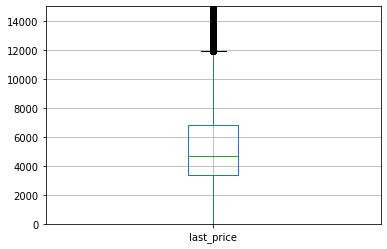

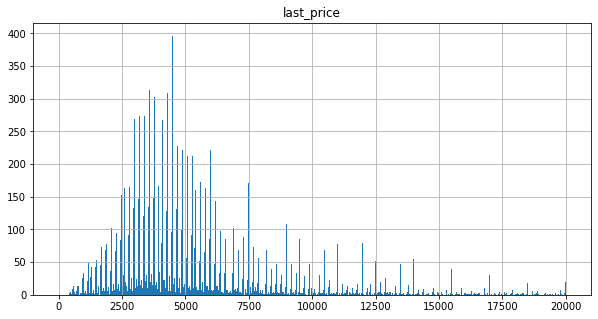

In [ ]:
print(data['last_price'].unique())
print(data['last_price'].describe())
data['last_price'] = data['last_price']/1000 # для удобства просмотра и построения графика мы сократили числа на 1000
data['last_price'] = data['last_price'].astype('int') # перевели в целое число
print(data.query('last_price>12000')['last_price'].count()) # выбросы = 1941 строка, все что выше 12 млн. по графику
print(data.boxplot(column='last_price'))
plt.ylim(0, 15000) # до 15 млн.
print(data.hist('last_price', bins=1000, figsize=(10, 5), grid=True, range=(1, 20000)))# до 20 млн.

Посмотрев данные мы увидели, что цена min= 12190 рублей(не правдоподобно мало), max=763 млн.р.(большая цифра). Средняя цена = 6,5 млн.р.,  медиана = 4,6 млн.р.,  это выглядит более менее правдоподобно. Все что выше 12 млн. являются выбросом по графику -их количество 1941 строк. Данные выбросы нельзя считать анамалием, так как есть объекты с большой площадью 900кв.м.(3-этажный пентхаус допустим) и они вполне могут стоить 700 млн.р., но они нам мешают для дальнейшего анализа, поэтому мы их уберем и сохраним в нашем таблице new_data. Самое наибольшее число объектов продавалось в диапазоне от 2 до 10 млн.р., то есть однушки или небольшие двушки предполагаю.

#### rooms

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'rooms'}>]]
90


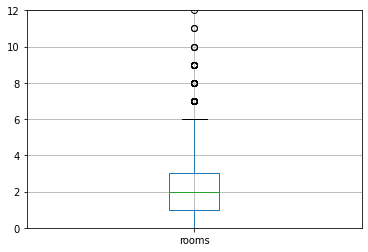

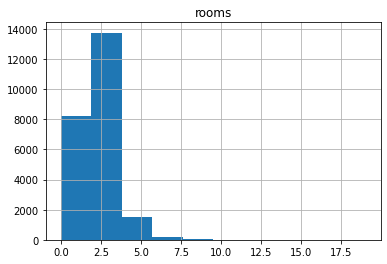

In [ ]:
print(data['rooms'].unique())
print(data['rooms'].describe())
print(data.boxplot(column='rooms'))
plt.ylim(0, 12)
print(data.hist('rooms', bins=10, grid=True,))
print(data.query('rooms>6')['rooms'].count())

Значения в количестве комнат варьируются от 0 до 19. Среднее и медиана = 2 комнаты. Выбросы по графику начинаются со значения 7 и составляют = 90 объектов, что совсем немного. Выбросы, сдесь скорее не анамалие, а исключение, ведь ранее мы уже видели объекты с 900 кв.м. и стоимостью 700 млн., в котрых скорее всего и есть 20- 25 комнат. Но мы их уберем для корректного анализа в данных и сохраним в новой таблице.

In [ ]:
new_data = data.query('10<total_area<120 and last_price<=12000 and rooms<6')
new_data.info()
new_data.shape[0]/data.shape[0] # минус 9%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21603 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21603 non-null  int64         
 1   last_price            21603 non-null  int64         
 2   total_area            21603 non-null  float64       
 3   first_day_exposition  21603 non-null  datetime64[ns]
 4   rooms                 21603 non-null  int64         
 5   ceiling_height        21603 non-null  float64       
 6   floors_total          21603 non-null  int64         
 7   living_area           21603 non-null  float64       
 8   floor                 21603 non-null  int64         
 9   is_apartment          21603 non-null  bool          
 10  studio                21603 non-null  bool          
 11  open_plan             21603 non-null  bool          
 12  kitchen_area          19527 non-null  float64       
 13  balcony         

0.9115574496814212

В данные скорректированы, мы убрали все выбросы, для дальнейшего глубоко анализа.

#### floor

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]
count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
[[<AxesSubplot:title={'center':'floor'}>]]
922


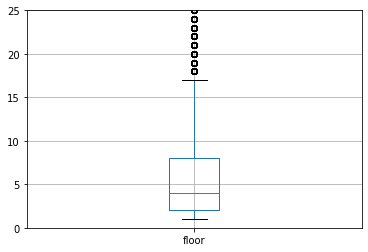

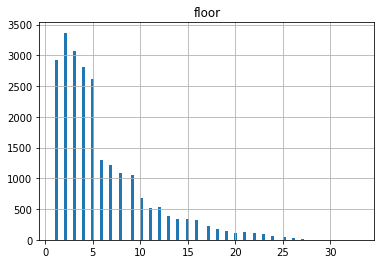

In [ ]:
print(data['floor'].unique())
print(data['floor'].describe())
print(data.boxplot(column='floor'))
plt.ylim(0, 25)
print(data.hist('floor', bins=100, grid=True))
print(data.query('floor>17')['floor'].count())

Значения этажа, на котрором находится объект варьируются от 1 до 33. Среднее = 5, а медиана = 4. Выбросы по графику начинаются со значения 18 этаж и составляют = 922 объекта, но считать их анамальными мы не можем, высоких зданий в Питере много. С данными все впорядке. Если в дальнейшем пригодятся эти данные, мы сможет убрать выбросы, для корректного анализа.

#### studio

In [ ]:
print(data['studio'].unique())
print(data['studio'].describe())
print(data[data['studio'] == True]['studio'].count())

[False  True]
count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object
149


Студий в данных очень мало = 149. Выглядит странно, но спрогнозировать мы не можем и примем информацию. Думаю, что необходимо дополнительно узнать у сотрудников об этой информации, возможно эта строка для ввода в объявлениях появилась совсем недавно, но нам для дальнейшего анализа они не нужны, поэтому примем все как есть.

#### open_plan

In [ ]:
print(data['open_plan'].unique())
print(data['open_plan'].describe())
print(data[data['open_plan'] == True]['open_plan'].count())

[False  True]
count     23699
unique        2
top       False
freq      23632
Name: open_plan, dtype: object
67


Объектов свободной планировки еще меньше = 67. Вывод такой же могу сделать, что и с студиями.

**Вывод** из этой части анализа следующий: Есть выбросы в общей площади и стоимости и количестве комнат - мы их скорректировали всохранили нужные нам данные в новой таблице new_data. В остальном данные впорядке.

##  Добавим в таблицу новые столбцы.
### Создадим столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [ ]:
data['price_one_meter'] = data['last_price']/data['total_area'] # цена за 1 кв.м.
data['price_one_meter'] = data['price_one_meter'].round(3) # для удобства просмотра, сократили после запятой числа до 3=х значений
data['weekday'] = data['first_day_exposition'].dt.weekday # вставили в таблицу день недели
data['weekday'] = data['weekday'].replace({0: '0-понедельник', 1: '1-вторник', 2: '2-среда', 3: '3-четверг',
                                           4: '4-пятница', 5: '5-суббота', 6: '6-воскресенье'}) # добавили уточнение в значениях
data['month'] = data['first_day_exposition'].dt.month # месяц публикации
data['year'] = data['first_day_exposition'].dt.year # год публикации
def type_floor(row): #  функция для категоризации типа этажа, в зависимости от расположения объекта
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'
data['type_floor'] = data.apply(type_floor, axis = 1) # вставили столбец с категорицацией типа этажа в таблицу
data['nearest_cityCenters_km'] = data['cityCenters_nearest']/1000 # из метров перевели в километры и добавили в таблицу
data['nearest_cityCenters_km'] = np.floor(pd.to_numeric(data['nearest_cityCenters_km'], errors='coerce')).astype('Int64')# перевели в тип int
print(data.info())
data.head() # проверили информацию - все столбцы вставлены корректно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23699 non-null  int64         
 1   last_price              23699 non-null  int64         
 2   total_area              23699 non-null  float64       
 3   first_day_exposition    23699 non-null  datetime64[ns]
 4   rooms                   23699 non-null  int64         
 5   ceiling_height          23699 non-null  float64       
 6   floors_total            23699 non-null  int64         
 7   living_area             23699 non-null  float64       
 8   floor                   23699 non-null  int64         
 9   is_apartment            23699 non-null  bool          
 10  studio                  23699 non-null  bool          
 11  open_plan               23699 non-null  bool          
 12  kitchen_area            21421 non-null  float6

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,type_floor,nearest_cityCenters_km
0,20,13000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,<NA>,120.370,3-четверг,3,2019,другой,16
1,7,3350,40.4,2018-12-04,1,2.70,11,18.600000,1,False,...,NaN,0,NaN,81,82.921,1-вторник,12,2018,первый,18
2,10,5196,56.0,2015-08-20,2,2.70,5,34.300000,4,False,...,90.0,2,574.0,558,92.786,3-четверг,8,2015,другой,13
3,0,64900,159.0,2015-07-24,3,2.70,14,91.177695,9,False,...,84.0,3,234.0,424,408.176,4-пятница,7,2015,другой,6
4,2,10000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121,100.000,1-вторник,6,2018,другой,8


### Рассмотрим более детально получившиеся столбы *type_floor*, *weekday*, *month*


####  type_floor

['другой' 'первый' 'последний']
count      23699
unique         3
top       другой
freq       17446
Name: type_floor, dtype: object
другой       17446
последний     3336
первый        2917
Name: type_floor, dtype: int64


<AxesSubplot:>

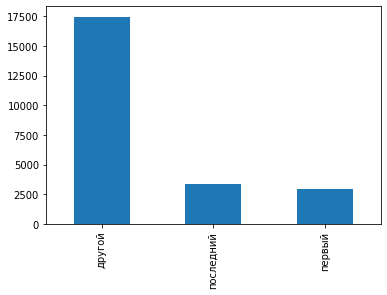

In [ ]:
print(data['type_floor'].unique())
print(data['type_floor'].describe())
print(data['type_floor'].value_counts())
data['type_floor'].value_counts().plot(kind='bar')

Преобладает тип этажа другой, что вполне естественно ведь объектов между первым и последним очень много, этажности домов различные.

#### weekday

['3-четверг' '1-вторник' '4-пятница' '0-понедельник' '2-среда'
 '6-воскресенье' '5-суббота']
count         23699
unique            7
top       3-четверг
freq           4295
Name: weekday, dtype: object
3-четверг        4295
1-вторник        4183
4-пятница        4000
2-среда          3974
0-понедельник    3612
5-суббота        1936
6-воскресенье    1699
Name: weekday, dtype: int64


<AxesSubplot:>

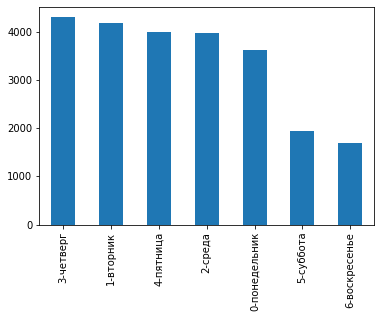

In [ ]:
print(data['weekday'].unique())
print(data['weekday'].describe())
print(data['weekday'].value_counts())
data['weekday'].value_counts().plot(kind='bar')

Видно по графику, что в выходные объявления размещают реже, чем в будни. Преобладают дни публикации - четверг, вторник и пятница.

[ 3 12  8  7  6  9 11  4  5  2  1 10]
2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month, dtype: int64


<AxesSubplot:>

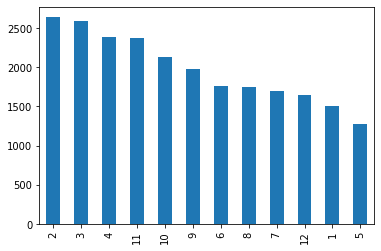

In [ ]:
print(data['month'].unique())
print(data['month'].value_counts())
data['month'].value_counts().plot(kind='bar')

Из графика можем сделать предположение, что объявления о продажи недвижимости выкладывают больше с февраля по апрель и с октября по ноябрь, потому что:
- отпуска люди в основном проводят в летний период примерно с мая по сентябрь
- также длиные новогодние праздничные выходные выпадают на декабрь-январь (в декабре к новому году уже начинаются приготовления)
соответственно настроение не деловое и преполагаемые продажи недвижимости откладываются.

##  Проведем исследовательский анализ данных

### Посмотрим зависимость цены от указанных ниже параметров:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

#### зависимость цены от общей площади

Корреляция общая: 0.6536746964461856
Корреляция без выбросов; 0.7013357380406158


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

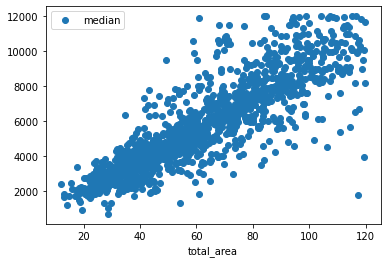

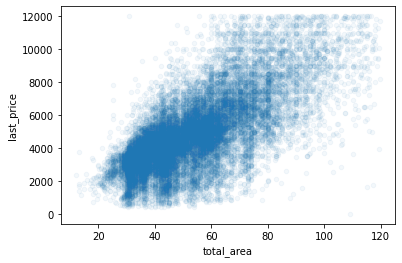

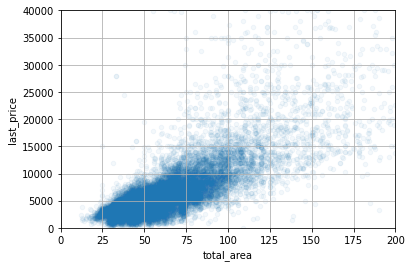

In [ ]:
total_area_price = new_data.pivot_table(
    index='total_area', values='last_price',aggfunc='median') # сводная таблица без выбросов
total_area_price.columns = ['median']
total_area_price.plot(y='median', style='o')# график медианы стоимости к общей площади
print('Корреляция общая:', data['total_area'].corr(data['last_price'])) # корреляция общая
print('Корреляция без выбросов;', new_data['total_area'].corr(new_data['last_price']))# корреляция без выбросов
new_data.plot(
    x='total_area',y='last_price', kind='scatter', alpha = 0.05) # диаграмма рассеяния без выбросов
data.plot(x='total_area',y='last_price', kind='scatter', alpha = 0.05, grid=True, xlim=(
    0, 200), ylim=(0, 40000))# диаграмма общая

Если данные не очищать от выбросов, то согласно графику и коэффициента корреляции Пирсона 0,65 зависимость цены от площади прослеживается (не ярко выраженная): чем выше площадь общая, тем выше цена за объект. Если же очистить от всех возможных выбросов, то корреляция увеличивается и равна 0,7. Если сделать цену медианой и очистить от выбросов, то по графику зависимость становится более выраженной. В общем зависимость однозначно есть.

#### зависимость цены от жилой площади

22
Корреляция без выбросов; 0.5776535978776579
Корреляция общая: 0.5858319029795065


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

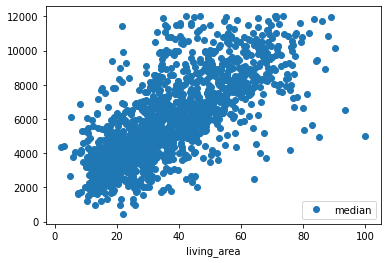

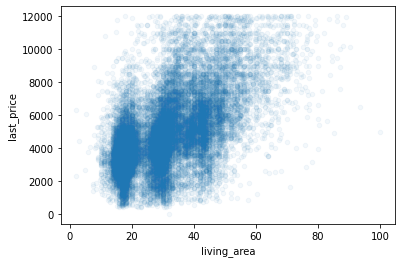

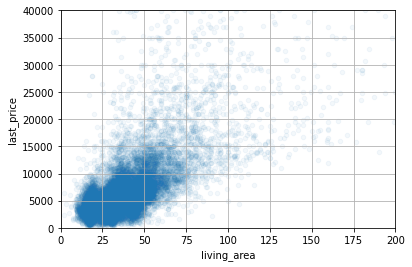

In [ ]:
print(new_data.query('living_area>80')['living_area'].count()) # выбросов в новой таблице всего 22, оставим.
living_area_price = new_data.pivot_table(index='living_area', values='last_price', aggfunc='median')
living_area_price.columns = ['median'] # сводная таблица без выбросов со средней стоимостью объектов
living_area_price.plot(y='median', style='o') # график средней стоимости к жилой площади
print('Корреляция без выбросов;', new_data['living_area'].corr(new_data['last_price'])) # корреляция без выбросов
print('Корреляция общая:', data['living_area'].corr(data['last_price'])) # корреляция общая
new_data.plot(x='living_area',y='last_price', kind='scatter', alpha = 0.05) # диаграмма рассеяния без выбросов
data.plot(x='living_area',y='last_price', kind='scatter', alpha = 0.05, grid=True, xlim=(
    0, 200), ylim=(0, 40000))# диаграмма общая

Если данные не очищать от выбросов, то согласно графику и коэффициента корреляции Пирсона 0,58 зависимость цены от площади прослеживается (не ярко выраженная): чем выше площадь жилая, тем выше цена за объект. Если же очистить от всех возможных выбросов, то корреляция увеличивается и равна 0,59. Если сделать цену медианой и очистить от всех выбросов, то по графику зависимость становится более выраженной. В общем зависимость однозначно есть, но не очень большая.

#### зависимость цены от площади кухни

450
Корреляция без выбросов: 0.48268291029275795
Корреляция общая: 0.5198684527417072


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

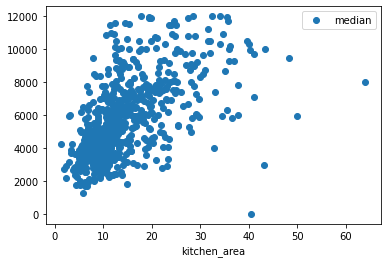

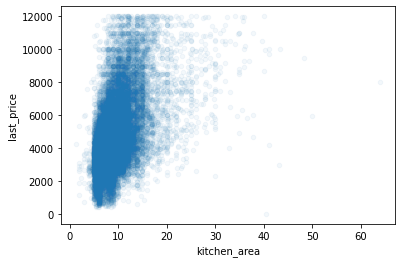

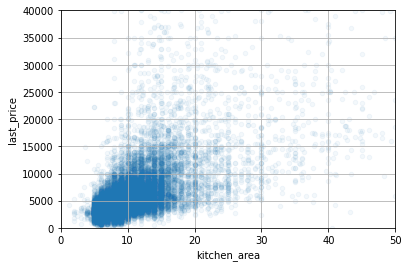

In [ ]:
print(new_data.query('kitchen_area>=20')['kitchen_area'].count()) # выбросов немного, оставим их
kitchen_area_price = new_data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
kitchen_area_price.columns = ['median']
kitchen_area_price.plot(y='median', style='o')
print('Корреляция без выбросов:', new_data['kitchen_area'].corr(new_data['last_price'])) # корреляция без выбросов
print('Корреляция общая:', data['kitchen_area'].corr(data['last_price'])) # корреляция общая
new_data.plot(x='kitchen_area',y='last_price', kind='scatter', alpha = 0.05) # диаграмма рассеяния без выбросов
data.plot(x='kitchen_area',y='last_price', kind='scatter', alpha = 0.05, grid=True, xlim=(
    0, 50), ylim=(0, 40000))# диаграмма общая

Если брать изначальные данные data, то согласно графику и коэффициента корреляции Пирсона 0,51, т.е. зависимость цены от площади прослеживается (не ярко выраженная): чем выше площадь кухни, тем выше цена за объект. Если же очистить от всех возможных выбросов (new_data), то корреляция уменьшается и равна 0,49. Если сделать цену медианой и отбросить выбросы, то по графику зависимости особо не видно. В общем зависимость маленькая.

#### зависимость цены от количества комнат

0.43863686480422986

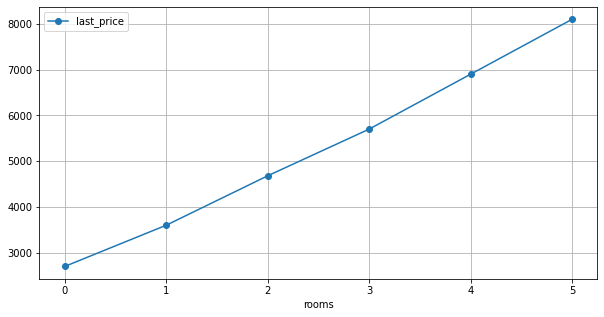

In [ ]:
new_data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(
    style='o-',grid=True, figsize=(10, 5))
new_data['rooms'].corr(new_data['last_price'])

Здесь эксперементировать не будем, а сразу возьмем скорректированные данные. Зависимость по графику прослеживается: чем больше комнат, тем выше цена, что по логике похоже на правду. Хотя по коэффициенту 0,45 эта зависимость выглядит маленькой.

#### зависимость цены от этажа на котором расположена квартира (первый, последний, другой)

<AxesSubplot:>

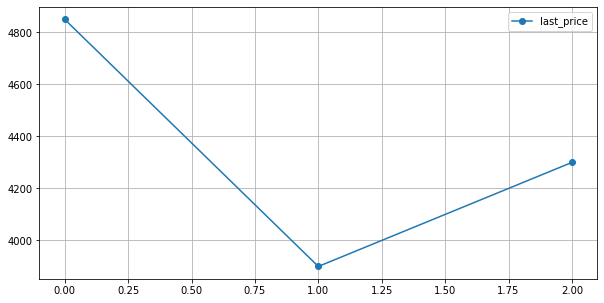

In [ ]:
data.pivot_table(index='type_floor', values='last_price', aggfunc='median').reset_index().plot(style='o-',grid=True, figsize=(10, 5))

Зависимость по графику небольшая есть. Недвижимость на первом и последнем этаже имеет меньшую стоимость чем остальные объекты.


#### зависимость цены от даты размещения (день недели, месяц, год)
##### день недели

<AxesSubplot:>

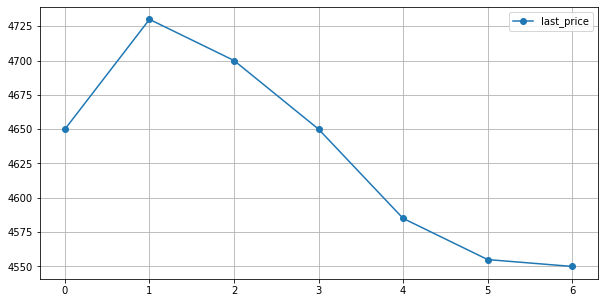

In [ ]:
data.pivot_table(index='weekday', values='last_price', aggfunc='median').reset_index().plot(
    style='o-',grid=True, figsize=(10, 5))

По графику можем судить, что зависимость почти нет: так от вторника к пятнице стоимость жилья уменьшаяется, потом увеличивается.

##### месяц

0.005441512855633027

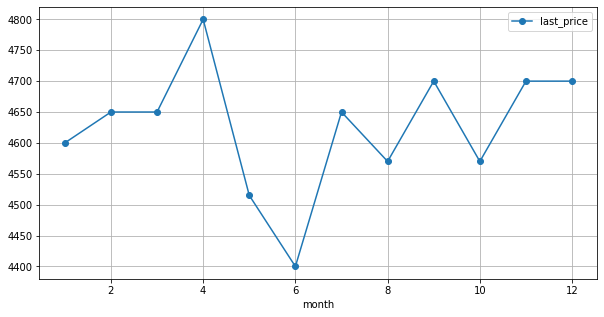

In [ ]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot(
    style='o-',grid=True, figsize=(10, 5))
data['month'].corr(new_data['last_price'])

Зависимости по графику и по коэффициенту нет.

##### год

0.002101341549162844

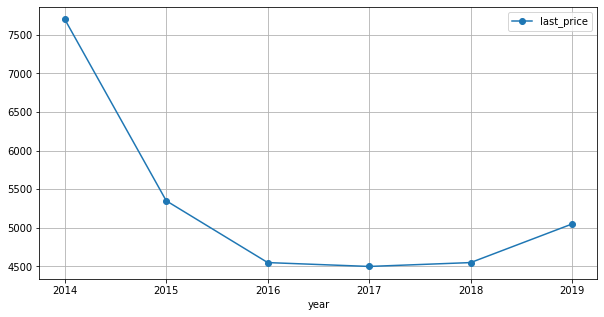

In [ ]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot(
    style='o-',grid=True, figsize=(10, 5))
data['year'].corr(new_data['last_price'])

Коэффициент Пирсона показывает, что зависимости нет. А по графику можем немного порассуждать: в 2014 году цена на недвижимость была высокой и к 2016 спала, затем откорректировалась и пошла снова немного в рост. Надо посмотреть события произошедшие в эти года и искать взаимосвязь с экономикой страны и другие причины на рынке недвижимости

**Вывод по зависимости к параметрам:** зависимость цены мы увидели от таких параметров: общая площадь, жилая площадь, количества комнат и этажа в котром объект находится - цена выше, если параметры растут. В остальных параметрах этой зависимости нет.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [ ]:
locality_name_price = data.pivot_table(index='locality_name', values='price_one_meter', aggfunc=['count', 'mean'])
locality_name_price.columns = ['count', 'mean']
locality_name_price.sort_values(by='count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15721,114.848732
Мурино,590,86.086936
Кудрово,472,95.324453
Шушары,440,78.677309
Всеволожск,398,68.653887
Пушкин,369,103.125691
Колпино,338,75.424393
Парголово,327,90.175792
Гатчина,307,68.746091


Получилось, что наибольшее число объявлений у Санкт-Петербурга и средняя цена за 1 кв.м. равна 114 000 р. Из этой выборки топ-10 последнее место занимает Выборг, где за 1 кв.м. выходит 58 000 р.

### Выделитм квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

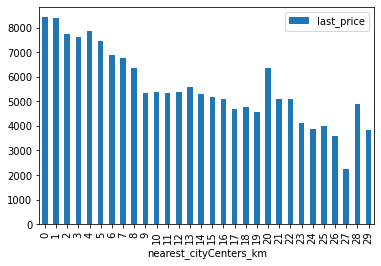

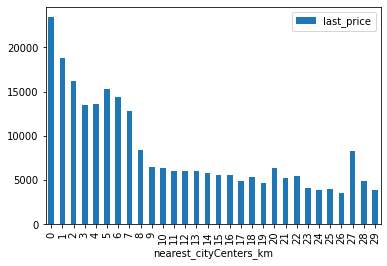

In [ ]:
Piter_km_price = data.query('locality_name == "Санкт-Петербург" and last_price<=12000').pivot_table(index='nearest_cityCenters_km', values='last_price', aggfunc='mean').reset_index()
Piter_km_price.plot(x='nearest_cityCenters_km',y='last_price', kind='bar')# без выбросов по цене
Piter_km_price = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='nearest_cityCenters_km', values='last_price', aggfunc='mean').reset_index().plot(
    x='nearest_cityCenters_km',y='last_price', kind='bar')# с выбросами по цене



Мы видим по графикам, что чем дальше от центра города находится квартира, тем стоимоть ее снижается. Таблицу мы построили без выбросов и график в первом варианте выглядит более плавно и не сильно выраженно На втором эта зависимость более выражена, где анамалии мы оставили.

## Общий вывод

В нашем распоряжении были данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. **Наша задача - научиться определять рыночную стоимость объектов недвижимости и установить параметры.** Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Прежде чем приступить к решению задачи, мы проделали большой путь по предобработке данных, рассмотрению информации каждого столбца. Также для выполнения дальнейшего анализа, ввели новые столбцы (цена одного квадратного метра; день недели публикации объявления (0 — понедельник, 1 — вторник и так далее); месяц публикации объявления; год публикации объявления; тип этажа квартиры (значения — «первый», «последний», «другой»); расстояние до центра города в километрах), которые в дальнейшем будут необходимы для выявления параметров влияющих на стоимость.

Затем, когда данные были преведены к надлежащему виду, мы приступили к анализу: нашли зависимость стоимости объекта недвижимости от общей площади, количества комнат, этажа на котором расположена квартира и расстояния объекта от центра города - здесь прослеживается связь:
- чем больше площадь - растет цена
- чем больше комнат - растет цена
- этаж первый или последний - цена ниже
- чем ближе к центру города (в км. был расчет) - цена выше
- цена в городе зв 1 кв.м. выше остальных пригородов.

Также нами были выявлены следующие анамалии и выбросы:
- количество дней размещения объявления(от публикации до снятия): все что более 500 дней
- количество комнат: более 6
- общая площадь: более 120 кв.м.
- цена: более 12 млн.р.
- потолки: более 3.5 метром
- балконы: более 3 штук

Можно установить следующие параметры (с учетом возможных выбросов) для определения стоимости недвижимости:
1. total_area < 120 кв.м. (общая площадь)
2. last_price < 12 млн.р. (цена)
3. type_floor (тип этажа)
4. rooms < 6 (количество комнат)
5. nearest_cityCenters_km (расстояние до центра в километрах)
6. price_one_meter (цена за 1 кв.м.)